# Exercise Set 3: Jacob Cardinal Tremblay, Charchit Kumar Sethi, and Sachin Pradeep Etakkepravan Thulicheri


Due: **10:00 25 April 2022**

Discussion: **13:00 29 April 2022**

**Online submission** at via [ILIAS](https://www.ilias.uni-koeln.de/ilias/goto_uk_exc_4593683.html) in the directory Exercises / Übungen -> Submission of Exercises / Rückgabe des Übungsblätter

# 1. Averaging spectral radio data [50 Points]

In [1]:
from astropy.io import fits
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.utils import data

In this exercise you will work on a data set of artificial radio observation `radio-map.fits`. It is a map of 5x5 spectra with 201 measured frequency/velocity channels (channel width is unity). If you number all spectra from 1 to 25 we use the following scheme to assign spectra to positions on the map (spectrum 1 is the top left spectrum):

**a.** Compute the total “integrated-intensity” map of the observations, i.e. integrate the spectra over the full spectral range for all positions and plot the 5x5 map in a suitable way. **10 Points**

In [12]:
#Open the data as a Fits file
radiodata = fits.open("C:/Users/jacob/Desktop/BCGS/Courses/Semester 2/Data Analysis/Exercise 3/radio-mapfits.sec")
radiodata = radiodata[0].data #Read into the first layer of the data

radiodata

array([[[-0.08488625,  0.07680481, -0.18626126, ...,  0.09660206,
          0.14551167,  0.11981787],
        [-0.04408858, -0.01587627,  0.09254898, ..., -0.09669123,
          0.06771724,  0.09786298],
        [ 0.07110942,  0.09667654, -0.18118608, ...,  0.05450621,
          0.03077478,  0.01488211],
        [ 0.04027201,  0.09683387,  0.00826442, ...,  0.12976076,
         -0.09473083,  0.00918999],
        [ 0.16194187,  0.01944596, -0.10673335, ..., -0.07040019,
          0.03231444,  0.00640852]],

       [[ 0.06214653, -0.08700428, -0.13975677, ...,  0.16132346,
         -0.00696356,  0.02276607],
        [ 0.09159201,  0.06191075,  0.09232937, ..., -0.11040901,
         -0.16252198, -0.09253119],
        [-0.02789262, -0.22450764,  0.1138657 , ..., -0.01873172,
          0.18089234,  0.15258039],
        [ 0.13957376, -0.12606841, -0.12006043, ..., -0.11408034,
         -0.14423526, -0.08154277],
        [ 0.06309249, -0.0845114 , -0.10414657, ...,  0.23529153,
         -0.02

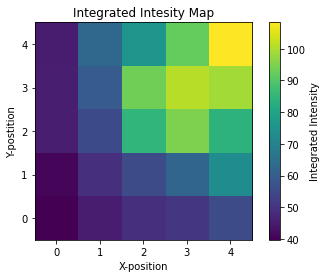

In [3]:
#Create an array
intspec = np.array([])

#Use a nested loop to run through all the data
for i in range(0,5):
    for j in range(0,5):
        subset = radiodata[i][j]
        #Although there will be some error associated with using a sum as an integral, it will give a reasonable value for this
            #calculation
        moment0 = np.sum(subset, axis=0)
        intspec = np.append(intspec,moment0)
        
#Reshape the array to have a 5x5 array        
intarr = np.reshape(intspec,(5,5))
#Plot the data
plt.imshow(intarr)
plt.title('Integrated Intesity Map')
plt.xlabel('X-position')
plt.ylabel('Y-postition')
plt.gca().invert_yaxis()
cbar = plt.colorbar()
cbar.set_label('Integrated Intensity')
plt.show()


**b.** Compute two channel maps by integrating over the frequency channels 50-100 and 100-150. Compare the two maps. **10 Points**

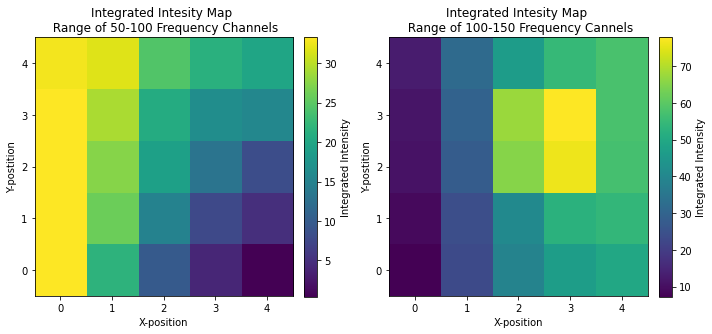

In [4]:
#Create two new arays
range1arr = np.array([])
range2arr = np.array([])

#Use a nested loop to go through all the data
for i in range(0,5):
    for j in range(0,5):
        subset = radiodata[i][j]
        range1 = subset[50:100]
        range2 = subset[100:150]
        data1 = np.sum(range1, axis=0)
        data2 = np.sum(range2, axis=0)
        range1arr = np.append(range1arr, data1)
        range2arr = np.append(range2arr, data2)

#Reshape the arrays so they are 5x5
range1arr = np.reshape(range1arr,(5,5))
range2arr = np.reshape(range2arr,(5,5))

#Create subplots and plot the data
fig, axs = plt.subplots(1, 2, figsize=(10, 10), sharey=True)
im = axs[0].imshow(range1arr)
im1 = axs[1].imshow(range2arr)
axs[0].set_title('Integrated Intesity Map \n Range of 50-100 Frequency Channels')
axs[0].set_xlabel('X-position')
axs[0].set_ylabel('Y-postition')
axs[1].set_title('Integrated Intesity Map \n Range of 100-150 Frequency Cannels')
axs[1].set_xlabel('X-position')
axs[1].set_ylabel('Y-postition')
axs[0].invert_yaxis()
axs[1].tick_params(labelleft=True)
fig.colorbar(im, ax=axs[0], label='Integrated Intensity', fraction=0.046, pad=0.04)
fig.colorbar(im1, ax=axs[1], label='Integrated Intensity', fraction=0.046, pad=0.04)
fig.tight_layout()
plt.show()        

Here we see that both maps are quite different, with the range of 50-100 channels only having an intensity peak around 40, whereas the range of 100-150 channels has an intensity around 80. This is likely partly due to the fact that most intensity peaks lie in the range of 100-150 frequency channels. 

**c.** Compute the average spectrum, by averaging all 25 positions. **10 Points**

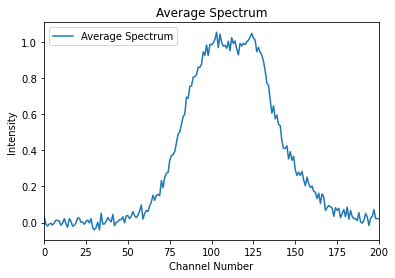

In [5]:
#Create a new array
preave = []

#Run through all the data to create an array with all the data
for i in range(0,5):
    for j in range(0,5):
        subset = radiodata[i][j]
        preave.append(subset)

#Average across all the rows in the data
m = np.array(preave)
average = np.mean(m, axis=0)

#PLot the average spectrum
plt.title("Average Spectrum")
plt.xlabel("Channel Number")
plt.ylabel("Intensity")
plt.margins(x=0)
plt.plot(average, label = "Average Spectrum")
plt.legend()
plt.show()

**d.** Plot every spectrum and overlay the average spectrum. Describe how the emission changes across the map. In particular how the line center position, the peak height and the line widths behave. **20 Points**

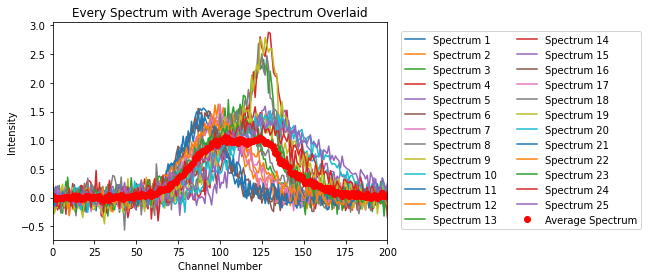

In [6]:
#Plot the every spectrum with the average spectrum overlaid
plt.plot(m.T, label = [f"Spectrum {i}" for i in np.arange(1, 26)])
plt.plot(average, "ro", label = "Average Spectrum")
plt.title("Every Spectrum with Average Spectrum Overlaid")
plt.xlabel("Channel Number")
plt.ylabel("Intensity")
plt.margins(x=0)
plt.legend(loc=(1.04,0.05), ncol=2)

One may note that it appears that the emission peak slowly shifts towards a higher channel number as the spectrum number increases. This means that the line center position is moving to a higher channel number. The peak height seems to also be increasing with channel number, and we see the widths also get larger as the spectrum number increases.